# Spectral

This notebook illustrates the spectral embedding of a graph through the [spectral decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#module-sknetwork.embedding) of the Laplacian matrix. 

In [1]:
%matplotlib inline
import numpy as np

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = np.array(['r', 'b', 'g', 'c', 'm', 'y'])

## Undirected graphs

**Loading**

In [3]:
graph = skn.data.karate_club(metadata=True)
adjacency = graph.adjacency
labels = graph.labels

**Embedding**

In [4]:
spectral = skn.embedding.Spectral(normalize=False)
embedding = spectral.fit_transform(adjacency)
embedding.shape

(34, 2)

**Visualization**

In [5]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


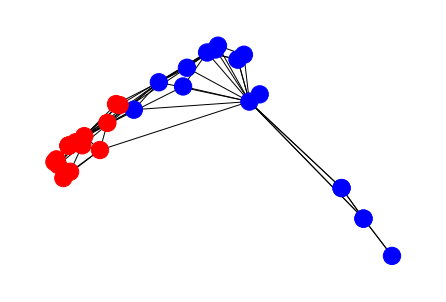

In [6]:
nx.draw(graph, pos=embedding, node_color=COLORS[labels])

**Predict**

In [7]:
# find the embedding of a new node
adjacency_vector = np.zeros(adjacency.shape[0], dtype = int)
adjacency_vector[:5] = np.ones(5, dtype = int)

In [8]:
embedding_vector = spectral.predict(adjacency_vector)

In [9]:
n = adjacency.shape[0]
new_edges = [(n,i) for i in adjacency_vector if adjacency_vector[i]]

In [10]:
graph.add_edges_from(new_edges)

In [11]:
new_embedding = np.vstack((embedding, embedding_vector))

In [12]:
new_labels = list(labels) + [2]

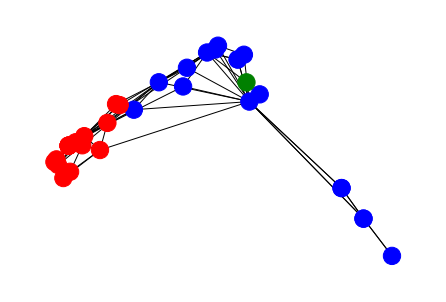

In [13]:
nx.draw(graph, pos=new_embedding, node_color=COLORS[new_labels])

**Metrics**

In [14]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.3764968333207547

**Parameters**

In [15]:
# embedding dimension
spectral = skn.embedding.Spectral(n_components=10)
spectral.fit(adjacency)

Spectral(n_components=10, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=LanczosEig(which='LA'))

In [16]:
# regularization
spectral = skn.embedding.Spectral(regularization=1)
spectral.fit(adjacency)

Spectral(n_components=2, normalized_laplacian=True, regularization=1, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=LanczosEig(which='LA'))

In [17]:
# regular Laplacian
spectral = skn.embedding.Spectral(normalized_laplacian=False)
spectral.fit(adjacency)

Spectral(n_components=2, normalized_laplacian=False, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=LanczosEig(which='SM'))

In [18]:
# solver
spectral = skn.embedding.Spectral(solver='halko')
spectral.fit(adjacency)

Spectral(n_components=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=HalkoEig(which='LA', n_oversamples=10, n_iter='auto', power_iteration_normalizer='auto', one_pass=False))

## Directed graphs

**Loading**

In [19]:
graph = skn.data.painters(metadata=True)
adjacency = graph.adjacency
names = graph.names

**Embedding**

In [20]:
# embedding of the graph considered as bipartite (each node considered twice)
bispectral = skn.embedding.BiSpectral(normalize=False)
bispectral.fit(adjacency)

BiSpectral(n_components=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=False, solver='auto')

In [21]:
embedding = bispectral.embedding_
embedding.shape

(14, 2)

**Visualization**

In [22]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

In [23]:
names_dict = {i:name for i, name in enumerate(names)}

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


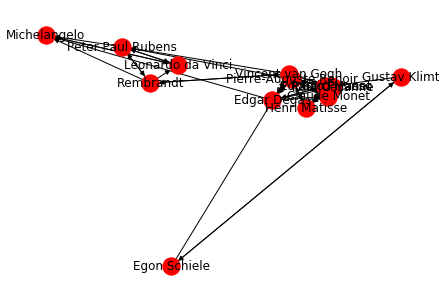

In [24]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=embedding, node_color='r', labels=names_dict)

**Metrics**

In [25]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.20017678091639446

## Bipartite graphs

**Loading**

In [26]:
graph = skn.data.movie_actor(metadata=True)
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

**Embedding**

In [27]:
bispectral = skn.embedding.BiSpectral(normalize=False)
bispectral.fit(biadjacency)

BiSpectral(n_components=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=False, solver='auto')

In [28]:
embedding_row = bispectral.embedding_row_
embedding_row.shape

(15, 2)

In [29]:
embedding_col = bispectral.embedding_col_
embedding_col.shape

(16, 2)

**Visualization**



In [30]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [31]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [32]:
n1, n2 = biadjacency.shape
embedding = np.vstack((embedding_row, embedding_col))

In [33]:
colors = n1 * ['r'] + n2 * ['b']

In [34]:
names_dict = {i: movie for i, movie in enumerate(movies)}
names_dict.update({n1 + i: actor for i, actor in enumerate(movies)})

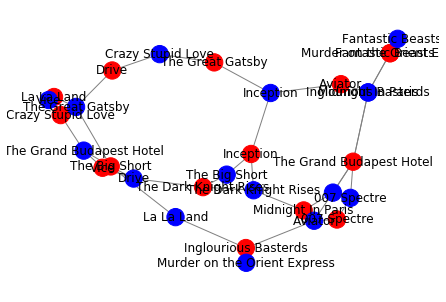

In [35]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, embedding, node_color=colors, labels=names_dict, edge_color='grey')